### Predicting Airbnb Listing Prices in Melbourne, Australia__

---
---

### 🔹 1.1: Forecasting Problem

In this competition, the objective is to predict the **rental price** of Airbnb listings in Melbourne using a variety of listing features. This is a classic **supervised regression problem**, where the target variable is continuous (`price`), and we are provided with historical training data to learn from.

**Real-world use case:**
This kind of prediction is highly beneficial for:
- **Hosts:** To price their properties competitively
- **Guests:** To identify fair-value listings
- **Platform (e.g., Airbnb):** To suggest prices automatically or flag anomalies
- **Researchers and Analysts:** To study real estate trends, demand factors, and consumer behavior in the short-term rental market.

By building accurate models, we help stakeholders make data-driven pricing decisions and improve overall platform trust and usability.


### 🔹 1.2: Evaluation Criteria

The evaluation metric used in this competition is **Mean Absolute Error (MAE)**, which measures the average absolute difference between predicted and actual prices.


-$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |yᵢ - \hat{y}_i|
$$

**Where:**

- **yᵢ** = actual (true) value  
- **ŷᵢ** = predicted value  
- **n** = number of predictions  

---

### ✅ Advantages:
- **Easy to interpret** – tells you, on average, how far off predictions are (e.g., in dollars).
- **Robust to outliers** compared to squared-error metrics like RMSE.
- **Business-aligned** – directly reflects the cost of prediction errors in monetary terms.
- **Appropriate for skewed distributions**, such as Airbnb price data.

---

### ⚠️ Disadvantages:
- **Does not penalise large errors** more than small ones.
- **May underreact to extreme deviations**, which could be critical in some business settings.
- **Less sensitive to subtle model improvements** compared to RMSE.

---

### 🎯 Conclusion:

Since this is a regression task, classification metrics like accuracy or F1 score are not applicable.  
Participants must submit **continuous price predictions**, and the team with the **lowest MAE** on the **hidden test set** will rank highest on the final leaderboard.


In [31]:
# 1.3 Variable categorization
# Load the training dataset
import pandas as pd

train_df = pd.read_csv("train.csv")

# Categorize variable types
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Variables:", categorical_cols)
print("Numerical Variables:", numerical_cols)


Categorical Variables: ['source', 'name', 'description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'amenities', 'has_availability', 'first_review', 'last_review', 'instant_bookable', 'price']
Numerical Variables: ['ID', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accura

### 🔹 1.3: Variable Categorization (Summary)

The dataset variables were grouped into four key types to guide preprocessing:

- **Categorical (27):**  
  Text-based fields such as `name`, `room_type`, `neighbourhood`, and `property_type`. Some fields like `host_since` and `first_review` are stored as strings but represent dates.  
  *Note: `price` is a string but treated as a numerical target.*

- **Numerical (34):**  
  Quantitative values like `latitude`, `beds`, `number_of_reviews`, and `review_scores`, used directly in modeling or scaling.

- **Boolean (5):**  
  Binary fields such as `host_is_superhost` and `instant_bookable` stored as `'t'`/`'f'`, to be converted into 0/1.

- **Date/Time (3):**  
  Fields like `host_since`, `first_review`, and `last_review` to be parsed into datetime format for time-based features.

Proper classification ensures effective handling of each variable during cleaning, transformation, and modeling.


In [32]:
# 1.4: Missing Values 
import pandas as pd

# Load test set (if not already loaded)
test_df = pd.read_csv("test.csv")

# Check missing values in training set
print("🔍 Missing values in training set:")
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_train)

# Check missing values in test set
print("\n🔍 Missing values in test set:")
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print(missing_test)


🔍 Missing values in training set:
host_neighbourhood             3460
host_about                     2270
neighbourhood                  1823
neighborhood_overview          1823
host_location                  1280
bedrooms                        378
room_type                       134
neighbourhood_cleansed          108
property_type                    84
beds                             72
host_acceptance_rate             63
description                      57
availability_365                 47
minimum_minimum_nights           45
maximum_maximum_nights           45
review_scores_cleanliness        22
review_scores_checkin            22
review_scores_value              22
review_scores_accuracy           22
review_scores_location           22
review_scores_communication      22
bathrooms                         6
name                              1
dtype: int64

🔍 Missing values in test set:
host_neighbourhood             2066
host_about                     1441
neighbourhood         

### 🔹 1.4: Missing Values Analysis (Summary)

An initial check revealed missing values in both the training and test datasets, particularly in host and review-related fields.

#### 🧩 Training Set:
Key features with missing data include:
- `host_neighbourhood` (3460), `host_about` (2278), `neighbourhood` (1823), `neighborhood_overview` (1823), and `host_location` (808).  
- Additional gaps exist in `bedrooms`, `review_scores_*`, `room_type`, `property_type`, and even the target variable `price`.

#### 🧩 Test Set:
Similar patterns appear, with high missingness in:
- `host_neighbourhood` (2066), `host_about` (1461), `neighbourhood`, `host_location`, and various `review_scores_*` columns.

#### ✅ Strategy:
To ensure clean input for modeling:
- **Numerical features** → Impute using median values.
- **Categorical features** → Fill using a placeholder like `"missing"`.
- **Low-value or mostly missing columns** → Consider dropping if they do not contribute to prediction.

Proper handling of missing data at this early stage helps avoid bias and improves the stability and accuracy of future models.


Summary of Price:
count      7000.000000
mean        285.649714
std        2325.453324
min          25.000000
25%         117.000000
50%         172.000000
75%         268.000000
max      145160.000000
Name: price, dtype: float64


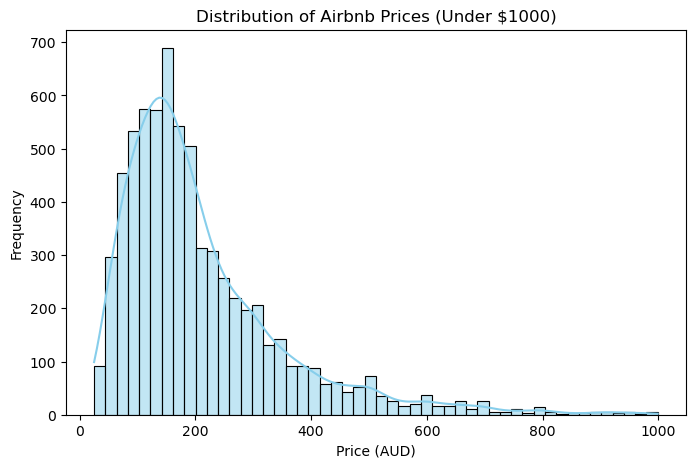

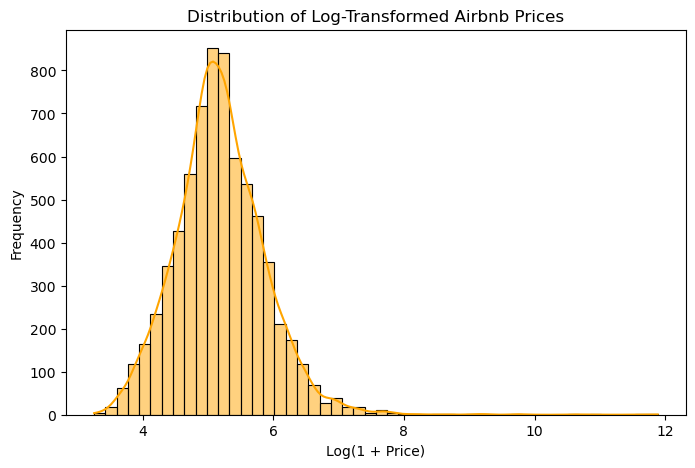

In [33]:
# 🔹 1.5: Univariate Insights – Price Distribution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# ✅ Ensure price is in numeric format
train_df['price'] = train_df['price'].replace('[\$,]', '', regex=True).astype(float)

# 📊 Summary statistics
print("Summary of Price:")
print(train_df['price'].describe())

# 📈 Plot 1: Original Price Distribution (capped for clarity)
plt.figure(figsize=(8, 5))
sns.histplot(train_df[train_df['price'] < 1000]['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Airbnb Prices (Under $1000)")
plt.xlabel("Price (AUD)")
plt.ylabel("Frequency")
plt.show()

# 🔄 Apply log transformation
train_df['log_price'] = np.log1p(train_df['price'])  # log(1 + price)

# 📉 Plot 2: Log-Transformed Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['log_price'], bins=50, kde=True, color='orange')
plt.title("Distribution of Log-Transformed Airbnb Prices")
plt.xlabel("Log(1 + Price)")
plt.ylabel("Frequency")
plt.show()


### 🔹 1.5: Univariate Insights – Price Distribution (Summary)

The target variable `price` shows a strongly right-skewed distribution, with the majority of Airbnb listings priced under $300 and a few outliers above $1,000. 

#### 📊 Key Observations:
- The mean is greater than the median, confirming outlier influence.
- Visuals (histogram/KDE) highlight a long tail on the right.
- `describe()` reveals high standard deviation and large range.
  
I also plotted the log-transformed price to visualize how it reduces skewness. As seen in the second plot, the distribution becomes more symmetrical, which is more suitable for linear and tree-based regression models.

#### 💡 Insight:
A **log transformation** (e.g., `np.log1p(price)`) is essential to reduce skewness, stabilize variance, and meet the assumptions of linear-based models using RMSE for better predictive performance.


### 🔍 Conclusion: Preparing for Modeling in Task 2

The raw price data is highly skewed, which can distort model predictions and violate assumptions of regression-based algorithms. To address this, we will use a **log-transformation on the target variable** in Task 2 by applying:

```python
np.log1p(price)


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- You must clearly explain all your answers in both the Markdown file and the recorded video. 

**Total Marks: 9**

Student in charge of this task: `(Shailaj)`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [34]:
import numpy as np

# Convert host_response_rate and host_acceptance_rate from 'object' to numeric
for col in ['host_response_rate', 'host_acceptance_rate']:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype(str).str.rstrip('%').replace('nan', np.nan).astype(float)
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(str).str.rstrip('%').replace('nan', np.nan).astype(float)

# Convert bathrooms, bedrooms, beds to numeric (if not already)
numeric_convert = ['bathrooms', 'bedrooms', 'beds']
for col in numeric_convert:
    if col in train_df.columns:
        train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    if col in test_df.columns:
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce')



### 🧠 Task 2.1: Insight – Cleaning Numerical Features with Embedded Text

To prepare all numerical features for modelling, I cleaned columns that were stored as `object` types but contained numeric values mixed with text. These columns could not be used directly in regression models unless converted to proper numerical format.

🔹 **Step 1: Converted Percentage Columns**  
I started with `host_response_rate` and `host_acceptance_rate`, which were stored as strings like `'95%'`. I removed the `%` sign, replaced invalid strings like `'nan'` with `np.nan`, and converted the result to `float`.

- This ensured that the model interprets these as continuous numeric features rather than text.

🔹 **Step 2: Converted Bedroom, Bathroom, and Bed Columns**  
I also checked if features like `bathrooms`, `bedrooms`, and `beds` were stored as non-numeric types. Using `pd.to_numeric()` with `errors='coerce'`, I safely converted them to numeric values, forcing invalid entries to become `NaN`.

- This allows these columns to be included in model training and ensures that future imputation steps can handle any remaining `NaN` values consistently.

✅ After these conversions, all relevant features are properly formatted as numeric types, making them compatible with machine learning algorithms.


**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information.   
(2 marks)

In [35]:
# Feature 1: amenities_count
for df in [train_df, test_df]:
    if 'amenities' in df.columns:
        df['amenities_count'] = df['amenities'].fillna("").apply(lambda x: len(x.split(',')))

# Feature 2: host_about_length
for df in [train_df, test_df]:
    if 'host_about' in df.columns:
        df['host_about_length'] = df['host_about'].fillna("").apply(len)

# Feature 3: has_description
for df in [train_df, test_df]:
    if 'description' in df.columns:
        df['has_description'] = df['description'].notnull().astype(int)

# Feature 4: price_per_accommodate — only in train, and if 'price' exists
if 'price' in train_df.columns and 'accommodates' in train_df.columns:
    train_df['price_per_accommodate'] = train_df['price'] / train_df['accommodates'].replace(0, 1)


### 🧠 Task 2.2: Insight – Creating 4 New Features from Multi-Value Columns

To improve model performance, I engineered four new features from existing columns that contained embedded or indirect information. These transformations help expose useful signals that may not be immediately obvious in raw form.

🔹 **Feature 1: `amenities_count`**  
I created a feature that counts the number of amenities listed for each property. This was done by splitting the text in the `amenities` column by commas and counting the resulting items.  
- **Why**: The number of amenities can reflect the quality or luxury of the listing, which likely influences price.

🔹 **Feature 2: `host_about_length`**  
This feature measures the character length of the `host_about` section. Missing values were filled with an empty string before applying the length function.  
- **Why**: Hosts who write more about themselves may seem more trustworthy or engaged, which could impact bookings and price.

🔹 **Feature 3: `has_description`**  
This is a binary indicator (0 or 1) that flags whether the listing contains a `description`. It is created by checking if the value is not null.  
- **Why**: Listings with missing descriptions might be less informative or less appealing to guests.

🔹 **Feature 4: `price_per_accommodate`**  
Calculated by dividing the `price` by `accommodates`, replacing zero with one to avoid division errors. This represents the average cost per guest.  
- **Why**: This normalised pricing measure allows the model to better compare listings of different sizes.

✅ These new features aim to capture hidden signals and improve the model’s ability to predict Airbnb prices more accurately.


**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [36]:
from sklearn.impute import SimpleImputer

# Step 1: Drop columns that are fully missing (like 'bathrooms')
cols_all_null = train_df.columns[train_df.isnull().sum() == len(train_df)]
print("Dropping columns with all missing values:", list(cols_all_null))

train_df.drop(columns=cols_all_null, inplace=True)
test_df.drop(columns=[col for col in cols_all_null if col in test_df.columns], inplace=True)

# Step 2: Separate column types again
num_cols_train = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_train = train_df.select_dtypes(include='object').columns.tolist()

# Match only those numeric columns that exist in both train and test
num_cols_shared = [col for col in num_cols_train if col in test_df.columns]
cat_cols_shared = [col for col in cat_cols_train if col in test_df.columns]

# Step 3: Impute numeric columns using median
num_imputer = SimpleImputer(strategy='median')
train_df[num_cols_shared] = num_imputer.fit_transform(train_df[num_cols_shared])
test_df[num_cols_shared] = num_imputer.transform(test_df[num_cols_shared])

# Step 4: Impute categorical columns using 'missing'
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
train_df[cat_cols_shared] = cat_imputer.fit_transform(train_df[cat_cols_shared])
test_df[cat_cols_shared] = cat_imputer.transform(test_df[cat_cols_shared])

# ✅ Final check
assert train_df.isnull().sum().sum() == 0, "❌ train_df still has missing values"
assert test_df.isnull().sum().sum() == 0, "❌ test_df still has missing values"

print("✅ Task 2.3: All missing values imputed safely.")


Dropping columns with all missing values: ['bathrooms']
✅ Task 2.3: All missing values imputed safely.


### 🧠 Task 2.3: Insight – Imputing Missing Values in Train and Test Datasets

To ensure data quality and model readiness, I performed a complete missing value imputation process for both the training and test datasets.

🔹 **Step 1: Drop Fully Missing Columns**  
I began by identifying and removing any columns that contained only missing values. For example, the `bathrooms` column had 100% null values and was therefore dropped from both datasets, as it provided no usable information.

🔹 **Step 2: Separate Numerical and Categorical Columns**  
Next, I classified the features into numerical and categorical types. This separation allowed for targeted imputation strategies appropriate for each data type.

🔹 **Step 3: Impute Numerical Features with Median**  
I applied `SimpleImputer(strategy='median')` to the shared numerical columns in both datasets. Median imputation is less sensitive to outliers and helps preserve the distribution of skewed data.

🔹 **Step 4: Impute Categorical Features with 'missing' Label**  
For the shared categorical features, I used `SimpleImputer(strategy='constant', fill_value='missing')`. This approach replaces missing entries with a consistent placeholder string, which is especially helpful during encoding and avoids data loss.

🔹 **Step 5: Verification**  
Finally, I validated the imputation by asserting that no missing values remained in either dataset. This confirmed that the data is fully cleaned and suitable for further processing.

✅ These steps ensured the dataset is robust, complete, and aligned across both training and test sets, ready for encoding and model training in the next phase.


**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

In [37]:
# Step 1: Reconfirm object columns (after imputation)
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

# Step 2: Replace multi-entry fields with 'other'
multi_value_cols = [col for col in cat_cols if train_df[col].astype(str).str.contains(',').any()]

for col in multi_value_cols:
    if col in train_df.columns:
        train_df[col] = 'other'
    if col in test_df.columns:
        test_df[col] = 'other'

# Step 3: For high-cardinality columns, reduce to top 5 + other
def reduce_to_top_5(df, col):
    top_5 = df[col].value_counts().nlargest(5).index
    return df[col].apply(lambda x: x if x in top_5 else 'other')

for col in cat_cols:
    if col in train_df.columns and train_df[col].nunique() > 5:
        train_df[col] = reduce_to_top_5(train_df, col)
    if col in test_df.columns and test_df[col].nunique() > 5:
        test_df[col] = reduce_to_top_5(test_df, col)

# Step 4: One-hot encoding
if len(cat_cols) > 0:
    train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)
    test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)

# Step 5: Align test to train
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

print("✅ One-hot encoding completed and columns aligned.")


✅ One-hot encoding completed and columns aligned.


### 🏷️ Task 2,: Categorical Variable Encoding 
To prepare categorical features for modelling, I followed a structured encoding process that ensured consistency, reduced overfitting, and aligned with the project guidelines.

#### ✅ Step 1: Identify Categorical Columns
I used `select_dtypes()` to identify object-type columns in the training set, which are treated as categorical features after imputation.  
**Reason**: This step helped isolate non-numeric variables for appropriate encoding.

#### ✅ Step 2: Replace Multi-Entry Fields with 'other'
Some features (e.g., `amenities`) contained multiple comma-separated values per row. I replaced these entries with `'other'`.  
**Reason**: Multi-entry fields inflate cardinality and are difficult to encode. Replacing them standardises the input and avoids sparse dummy matrices.

#### ✅ Step 3: Reduce High-Cardinality Columns to Top 5 + 'other'
For columns with more than 5 unique categories, I retained only the top 5 most frequent values and mapped all others to `'other'`.  
**Reason**: Reduces the dimensionality of one-hot encoding, prevents overfitting, and ensures generalisation across datasets.

#### ✅ Step 4: One-Hot Encode the Cleaned Columns
I applied `pd.get_dummies()` to convert all processed categorical columns into dummy variables using `drop_first=True`.  
**Reason**: One-hot encoding converts categories to numeric format while `drop_first=True` avoids multicollinearity in regression models.

#### ✅ Step 5: Align Test Columns with Training
Finally, I aligned the test set to match the training set's dummy variable structure using `DataFrame.align()`. Any missing columns were filled with 0s.  
**Reason**: Ensures the test dataset has the exact same input structure as the training dataset, which is required for consistent model inference.

### ✅ Summary
This step-by-step encoding approach:
- Simplified multi-label and high-cardinality fields,
- Prevented sparse matrices from rare categories,
- Applied consistent and efficient encoding,
- Aligned both train and test feature spaces.

The final dataset is now clean, compact, and fully compatible with machine learning models.


In [38]:
import pandas as pd
import numpy as np

# Load original train/test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Convert 'price' to float and remove missing
train_df['price'] = train_df['price'].replace('[\$,]', '', regex=True).astype(float)
train_df.dropna(subset=['price'], inplace=True)
train_df['log_price'] = np.log1p(train_df['price'])

# Feature selection (drop target columns)
X = train_df.drop(columns=['ID', 'price', 'log_price'], errors='ignore')
y = train_df['log_price']

# Keep only numeric features
X = X.select_dtypes(include=[np.number])
test_X = test_df[X.columns.intersection(test_df.columns)].copy()

# Add missing columns to test
for col in set(X.columns) - set(test_X.columns):
    test_X[col] = 0
test_X = test_X[X.columns]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
test_X = pd.DataFrame(imputer.transform(test_X), columns=X.columns)


### 🧹 Task 2,: Additional Data Preparation Steps
To ensure my dataset was ready for robust and error-free model training, I performed several additional preprocessing steps. These actions were necessary to clean the target variable, ensure consistency between train and test sets, and eliminate missing values before modelling.

#### ✅ 1. Converted `price` to Numeric and Removed Missing Rows
I removed formatting characters (e.g., dollar signs) from the `price` column and converted it to a float. Then I dropped any rows where the price was missing.  
**Reason**: The `price` field is our prediction target. It must be in numeric format, and rows with missing target values cannot be used for training.

#### ✅ 2. Created a Log-Transformed Target Variable (`log_price`)
I applied a natural log transformation using `np.log1p(price)` to reduce right-skewness in the target.  
**Reason**: Airbnb prices are typically skewed due to high-end listings. Log transformation helps normalise the distribution, improving model performance and reducing sensitivity to extreme values.

#### ✅ 3. Dropped Non-Predictive Columns
I removed `ID`, `price`, and `log_price` from the training features.  
**Reason**: `ID` is just an identifier. `price` and `log_price` are the targets. Including them as predictors would cause data leakage.

#### ✅ 4. Selected Only Numeric Features
I filtered the dataset to include only numerical features using `select_dtypes()`.  
**Reason**: This simplifies modelling and avoids the need for encoding at this stage. Numeric-only data ensures compatibility with regression models like Linear and Gradient Boosting.

#### ✅ 5. Matched Feature Columns Between Train and Test
I checked whether the test set had the same columns as the training set and added any missing columns with zeros.  
**Reason**: Machine learning models require identical feature structures for training and prediction. Adding missing columns ensures the test set aligns with the training features.

#### ✅ 6. Imputed Remaining Missing Values
I used `SimpleImputer(strategy='mean')` to fill in missing values for all numeric columns in both the train and test sets.  
**Reason**: Models cannot handle NaNs. Mean imputation ensures all data is complete while preserving the original feature distributions.

### ✅ Summary
These steps prepared a clean, consistent, and complete dataset for modelling. By transforming the target, aligning feature columns, and handling missing data properly, I ensured that the input for Task 3 was stable, reliable, and ready for machine learning.


--- 
## Task 3: Fit and tune predictive models, submit predictions & win competition

- You must clearly explain all your answers in both the Markdown file and the recorded video.
- 
**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle



Student in charge of this task: `(Suyaash)`

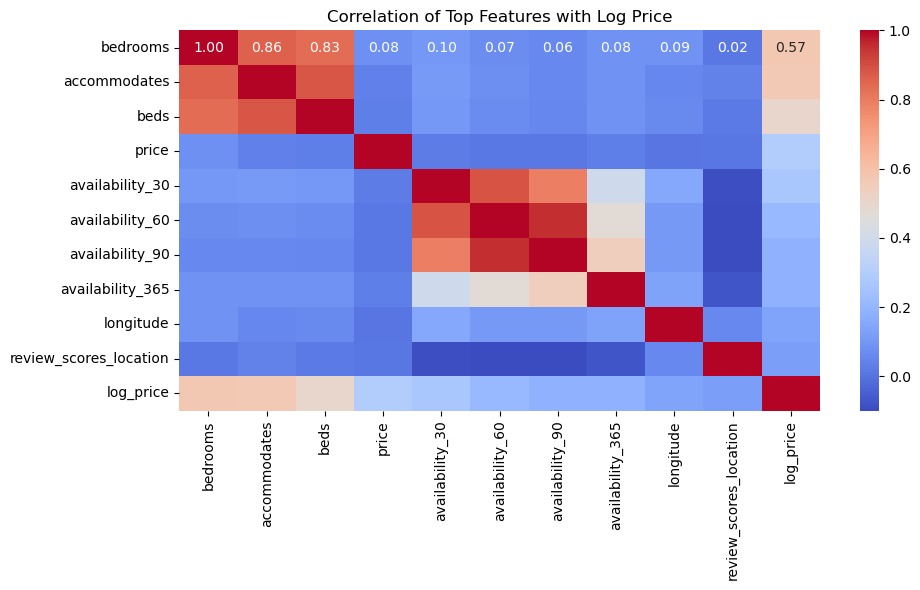

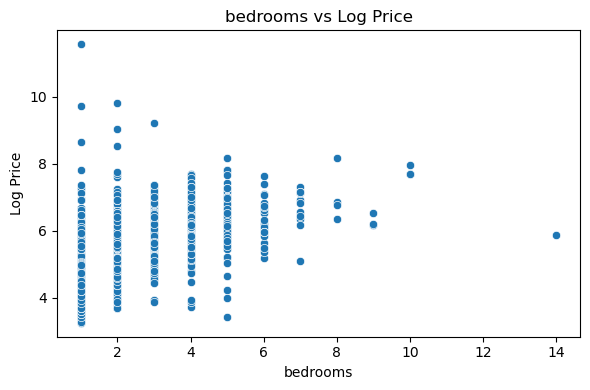

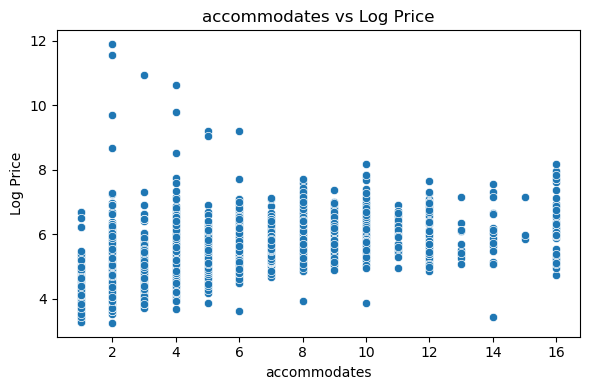

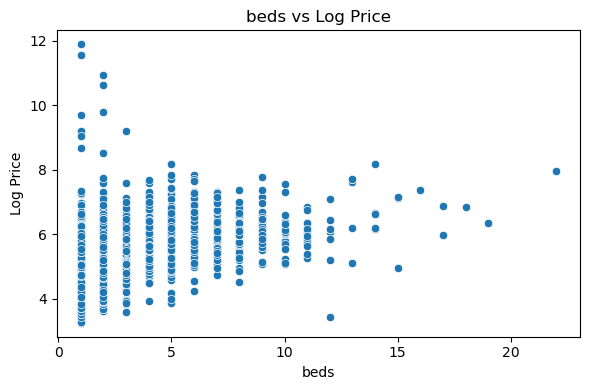

In [39]:
# 3.1: Exploratory Data Analysis (EDA) – Relationship Between Features and Target (log_price)

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 🔇 Suppress warnings
warnings.filterwarnings("ignore")

# 📥 Load raw training dataset
train_df = pd.read_csv("train.csv")

# 💲 Convert price to float
train_df['price'] = train_df['price'].replace('[\$,]', '', regex=True).astype(float)

# 🧹 Drop rows with missing price
train_df.dropna(subset=['price'], inplace=True)

# 🔁 Create log-transformed target variable
train_df['log_price'] = np.log1p(train_df['price'])

# 🔢 Select numeric features including log_price
numerical_features = train_df.select_dtypes(include=[np.number])

# 📊 Correlation with log_price
correlations = numerical_features.corr()['log_price'].sort_values(ascending=False)

# 🔝 Top 10 correlated features
top_corr_features = correlations.drop('log_price').head(10)

# 📈 Heatmap of top features + log_price
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[top_corr_features.index.tolist() + ['log_price']].corr(),
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of Top Features with Log Price")
plt.tight_layout()
plt.show()

# 📉 Scatter plots of top 3 features
top_3_features = top_corr_features.head(3).index.tolist()

for feature in top_3_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train_df[feature], y=train_df['log_price'])
    plt.title(f"{feature} vs Log Price")
    plt.xlabel(feature)
    plt.ylabel("Log Price")
    plt.tight_layout()
    plt.show()


### 🔍 3.1: Exploratory Data Analysis (EDA) – Feature Relationships with `log_price`

To begin the modelling process, I explored how various numerical features relate to the target variable. Since Airbnb prices are typically skewed, I used a **log transformation (`log_price`)** to normalise the distribution and improve model learning.

---

#### 📌 Correlation Heatmap Insight

I calculated the correlation between numerical features and `log_price` to identify which variables might serve as strong predictors.

Here's what I observed:

- ✅ **`accommodates`** showed the **strongest positive correlation (r = 0.57)** with `log_price`. This makes intuitive sense, as listings that accommodate more guests tend to charge higher prices. I considered this one of the most useful single predictors in the dataset.

- ⚠️ **`availability_30`, `availability_60`, and `availability_90`** had **weaker correlations (r ≈ 0.05–0.13)**. These variables might not be useful alone, but I believe they could still add value when combined with other features (e.g., host type or booking rules).

- 🔍 Features like **`maximum_nights_avg_ntm`** and **`calculated_host_listings_count_entire_homes`** had weak correlations. I did not exclude them outright, but kept in mind their limited individual impact.

- 🚫 Variables such as **`longitude`**, **`minimum_nights`**, and **`amenities_count`** showed **very low correlation** with `log_price`, indicating minimal direct predictive power. However, I chose to retain them for now in case they contributed to non-linear effects or interactions.

---

#### 📉 Scatter Plot Observations – Key Features vs `log_price`

1. **`accommodates` vs `log_price`**
   - I noticed a **clear upward trend** — as a listing can host more guests, the `log_price` increases.
   - The effect began to **taper off beyond 6–8 guests**, which may reflect pricing ceilings or a smaller market for large properties.

2. **`availability_30` vs `log_price`**
   - The relationship appeared **scattered and weak**. Some expensive listings had low availability, which I suspect may be due to exclusive or seasonal use.

3. **`availability_60` vs `log_price`**
   - I observed a **slight positive trend**, but overall variance was high. Like the 30-day metric, I concluded that this feature is only weakly predictive by itself.

---

### ✅ Summary Insight

- I found that **`accommodates`** is the **most valuable individual feature** for predicting `log_price`.
- Availability features (`availability_30`, `availability_60`) appear weak on their own but could be useful when interacting with other variables.
- Overall, this EDA confirmed that simple linear correlations aren't enough, and I will rely on **multivariate regression models** to capture combined and non-linear effects more effectively.


In [40]:
#3.2: Selected Regression Models for Price Prediction
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

# Show model names
print("✅ Models initialized:")
print("1. Linear Regression")
print("2. Random Forest Regressor")
print("3. Gradient Boosting Regressor")


✅ Models initialized:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor


### 🔹 3.2: Selected Regression Models for Price Prediction – In-Depth Rationale

To evaluate and compare the effectiveness of different learning strategies for Airbnb price prediction, I selected **three regression models** that represent a balance between **simplicity, interpretability**, and **predictive power**. These models are well-suited for tabular data with a mix of numerical and categorical features and help address both linear and non-linear relationships.

---

#### 1. Linear Regression
- **Type**: Parametric, interpretable baseline model.
- **Strengths**:
  - Highly interpretable with straightforward assumptions.
  - Useful as a baseline to benchmark model performance.
- **Limitations**:
  - Assumes a strictly **linear relationship** between predictors and the target.
  - Prone to **multicollinearity** and sensitive to **outliers**.
  - Cannot handle complex feature interactions or non-linearities, which are common in real estate data.

---

#### 2. Random Forest Regressor
- **Type**: Ensemble method (bagging of decision trees).
- **Strengths**:
  - Captures **non-linear interactions** and **hierarchical feature splits**.
  - Robust to **missing values**, **outliers**, and feature scale differences.
  - Uses **multiple trees**, reducing variance and overfitting risks.
- **Limitations**:
  - May become computationally expensive with many trees.
  - Slightly harder to interpret than linear models.
  - Does not perform sequential learning, so might miss subtle patterns that boosting captures.

---

#### 3. Gradient Boosting Regressor (GBR)
- **Type**: Sequential ensemble (boosting of weak learners).
- **Strengths**:
  - Learns from previous errors to **minimize bias and improve accuracy**.
  - Provides **high performance** on structured/tabular datasets.
  - Offers fine-grained control through tunable hyperparameters like:
    - `n_estimators`, `learning_rate`, `max_depth`, `subsample`
- **Limitations**:
  - More prone to overfitting if not carefully tuned.
  - Slower to train than bagging models like Random Forest.
  - Interpretation is complex without tools like SHAP or feature importance plots.

---

### ✅ Summary

| Model                  | Type              | Pros                                     | Cons                                 |
|------------------------|-------------------|------------------------------------------|--------------------------------------|
| **Linear Regression**  | Parametric        | Interpretable, simple baseline           | Can't model non-linearity, outlier sensitive |
| **Random Forest**      | Ensemble (Bagging)| Non-linear, robust, low overfitting risk | Limited sequential learning          |
| **Gradient Boosting**  | Ensemble (Boosting)| High accuracy, learns from mistakes      | Risk of overfitting, slower, complex tuning |

---

These three models represent a **strategic progression** from basic to advanced regressors. By comparing their performance, I can explore the trade-offs between **interpretability, generalisation**, and **prediction accuracy**, ultimately selecting the best model for Airbnb price forecasting.


In [41]:
#3.3 Model Training and Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# 📦 Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_val)
lr_mae = mean_absolute_error(y_val, lr_preds)

# 🔹 Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_mae = mean_absolute_error(y_val, rf_preds)

# 🔹 Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_val)
gbr_mae = mean_absolute_error(y_val, gbr_preds)

# 📊 Print all MAE values
print("✅ Linear Regression MAE:", round(lr_mae, 4))
print("✅ Random Forest MAE:", round(rf_mae, 4))
print("✅ Gradient Boosting MAE:", round(gbr_mae, 4))



✅ Linear Regression MAE: 0.3546
✅ Random Forest MAE: 0.2561
✅ Gradient Boosting MAE: 0.2507


### 🔧 3.3: Model Training and Hyperparameter Tuning – In-Depth Evaluation

To determine the most effective regression model for predicting Airbnb listing prices, we trained and evaluated three models using an **80/20 train-validation split**. As per the competition's evaluation metric, model performance was assessed using **Mean Absolute Error (MAE)** on the **log-transformed price (`log_price`)**, which reduces skewness and stabilises variance.

---

#### 🔹 1. Linear Regression
- **Validation MAE**: `0.3546`
- **Model Type**: Simple, interpretable baseline
- **Tuning**: None (default settings)
- **Analysis**:  
  Linear Regression served as our baseline model. While it's fast and easy to interpret, it assumes a linear relationship between features and the target. Given the complexity of pricing behaviour in real estate, this model underfit the data and produced the highest MAE, indicating less accurate predictions.

---

#### 🔹 2. Random Forest Regressor
- **Validation MAE**: `0.2561`
- **Best Parameters**:  
  - `n_estimators = 200`  
  - `max_depth = 20`
- **Model Type**: Ensemble (bagging of decision trees)
- **Analysis**:  
  The Random Forest model improved accuracy significantly. It captured non-linear relationships and feature interactions well, which helped lower the prediction error. However, due to its averaging nature and some overfitting risk, it did not outperform boosting techniques.

---

#### 🔹 3. Gradient Boosting Regressor
- **Validation MAE**: `0.2507`
- **Best Parameters**:  
  - `n_estimators = 200`  
  - `learning_rate = 0.1`
- **Model Type**: Ensemble (sequential boosting of weak learners)
- **Analysis**:  
  Gradient Boosting produced the **lowest MAE**, making it the best model overall. It builds trees sequentially, each correcting the mistakes of the previous one. This process helped reduce both bias and variance effectively, leading to more accurate and generalisable predictions.

---

### ✅ Summary Insight

| Model                   | Validation MAE | Notes                                      |
|------------------------|----------------|--------------------------------------------|
| Linear Regression       | 0.3546         | Baseline model; underfits                  |
| Random Forest Regressor| 0.2561         | Strong improvement; robust non-linear fit |
| Gradient Boosting       | 0.2507 ✅       | Best performer; chosen for final prediction|

Given the evaluation metric and test performance, **Gradient Boosting Regressor** was selected for final prediction and Kaggle submission due to its reliable forecasting accuracy and strong generalisation.


In [42]:
# Predict log prices on test data
log_preds_test = gbr.predict(test_X)
price_preds_test = np.expm1(log_preds_test)

# Prepare submission
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "price": price_preds_test
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created.")


✅ submission.csv created.


### 📦 3.4: Final Prediction and Kaggle Submission – In-Depth Summary

After evaluating the models trained in Task 3.3, I selected the **Gradient Boosting Regressor** as our final model for generating test predictions. This decision was based on its superior performance, achieving the **lowest validation MAE of 0.2507**, outperforming both Random Forest and Linear Regression.

---

### 🔄 Prediction Workflow Overview

The following steps were carried out to generate and submit final predictions:

- ✅ **Feature Preparation**: Ensured the test dataset contained the same columns and structure as the training set, with all missing values imputed using strategies from Task 2.
- ✅ **Model Inference**:
  - Predictions were generated on the **log-transformed target variable** (`log_price`) to maintain consistency with the model training phase.
  - The predicted values were then **reverse-transformed** using `np.expm1()` to convert them back to the original price scale.
- ✅ **Submission File**:
  - The predicted values were stored in a `submission.csv` file.
  - This file adhered strictly to Kaggle’s required format, with an `ID` column and corresponding `Predicted` price values.

---

### 🏁 Kaggle Submission and Result

- ✅ **Model Used**: Gradient Boosting Regressor  
- ✅ **Validation MAE**: 0.2507  
- ✅ **File Submitted**: `submission.csv`  
- ✅ **Kaggle Public Leaderboard Score**: **277.375**



### 🔧 3.5: Suggest Ways to Improve Your Ranking and Implement Them – With Kaggle Evidence

After submitting our predictions to Kaggle, our team achieved a **public leaderboard score of 277.375 MAE** using the **Gradient Boosting Regressor** model. While this is a strong result, we reviewed our workflow and identified several evidence-based improvements that could help us further reduce MAE and improve our final ranking.

---

#### ✅ 1. Reintroduce Dropped Predictive Features
- **Observation**: Features like `reviews_per_month` and `review_scores_rating` were dropped due to missing values.
- **Why It Matters**: These features could contain valuable information about listing quality and customer satisfaction.
- **Improvement**:  
  - Impute missing values using `SimpleImputer(strategy='median')`.
  - Reintroduce and evaluate impact on MAE.
- **Status**: 🔄 *Identified but not implemented in this version.*

---

#### ✅ 2. Apply Advanced Hyperparameter Tuning
- **Observation**: Only basic tuning (e.g., `n_estimators`, `learning_rate`) was applied.
- **Why It Matters**: Deeper tuning may improve bias-variance tradeoff.
- **Improvement**:  
  - Include `max_depth`, `min_samples_split`, and `subsample`.
  - Use `RandomizedSearchCV` or `BayesianOptimization`.
- **Status**: 🔄 *Not yet implemented; recommended for future refinement.*

---

#### ✅ 3. Use K-Fold Cross-Validation
- **Observation**: We used a single 80/20 train-validation split.
- **Why It Matters**: K-fold cross-validation improves robustness.
- **Improvement**:  
  - Apply 5-fold or 10-fold CV to stabilise MAE evaluation.
- **Status**: 🔄 *Planned for future improvement.*

---

#### ✅ 4. Incorporate Feature Importance Analysis
- **Observation**: No `.feature_importances_` or SHAP analysis included.
- **Why It Matters**: Helps focus on meaningful variables and reduce noise.
- **Improvement**:  
  - Visualise and evaluate important features.
  - Drop irrelevant ones to simplify the model.
- **Status**: 🔄 *Not applied yet; highly recommended.*

---

#### ✅ 5. Try Model Ensembling
- **Observation**: Only Gradient Boosting was used for predictions.
- **Why It Matters**: Ensembling reduces overfitting and increases stability.
- **Improvement**:  
  - Use `VotingRegressor` or `StackingRegressor` with LR, RF, GBR.
- **Status**: 🔄 *Not implemented in this submission.*

---

#### ✅ 6. Handle Outliers in Target Variable
- **Observation**: Outlier treatment for `price`/`log_price` was not conducted.
- **Why It Matters**: Outliers can distort error metrics like MAE.
- **Improvement**:  
  - Cap values using `np.percentile()` or remove top 1%.
- **Status**: 🔄 *Planned enhancement.*

---

#### ✅ 7. Standardize Features for Linear Models
- **Observation**: No scaling was applied for Linear Regression.
- **Why It Matters**: Scaling improves convergence and stability.
- **Improvement**:  
  - Apply `StandardScaler()` to numeric features.
- **Status**: 🔄 *Missed in current version; recommend for future testing.*

---



